# Import Libraries 

In [ ]:
# Package imports
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option('display.max_rows', None)

# Import Dataset

In [ ]:
# Load data
df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx')

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Data Preparation

## Count Missing Value

In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
# Count Missing Value in Column CustomerID that does not occupy missing values or NA values
df = df[df['CustomerID'].notna()]

df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## Find Statistics Descriptive from Quantity & UnitPrice

In [ ]:
df[['Quantity', 'UnitPrice']].describe()

,Quantity,UnitPrice
count,406829.000000,406829.000000
mean,12.061303,3.460471
std,248.693370,69.315162
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


In [ ]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0 )]
df[['Quantity', 'UnitPrice']].describe()

,Quantity,UnitPrice
count,397884.000000,397884.000000
mean,12.988238,3.116488
std,179.331775,22.097877
min,1.000000,0.001000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,8142.750000


## Check Info Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


## Find Unique Value in Columns

In [ ]:
len(df['CustomerID'].unique())

4338

In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
df[['InvoiceNo', 'StockCode', 'CustomerID', 'Country']].nunique()

InvoiceNo     18532
StockCode      3665
CustomerID     4338
Country          37
dtype: int64

In [ ]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

## Find Number of COuntry Based on InvoiceNo

In [ ]:
df.groupby(by=['Country'])['InvoiceNo'].count()

Country
Australia                 1182
Austria                    398
Bahrain                     17
Belgium                   2031
Brazil                      32
Canada                     151
Channel Islands            748
Cyprus                     614
Czech Republic              25
Denmark                    380
EIRE                      7236
European Community          60
Finland                    685
France                    8341
Germany                   9040
Greece                     145
Iceland                    182
Israel                     248
Italy                      758
Japan                      321
Lebanon                     45
Lithuania                   35
Malta                      112
Netherlands               2359
Norway                    1071
Poland                     330
Portugal                  1462
RSA                         57
Saudi Arabia                 9
Singapore                  222
Spain                     2484
Sweden                     451


In [ ]:
df['Country_isUK'] = np.where(df['Country']=='United Kingdom', "UK", "Non-UK")

In [ ]:
customer_origin = df.groupby(['Country_isUK']).count()

In [ ]:
customer_origin.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
Country_isUK,,,,,,,,
Non-UK,43563,43563,43563,43563,43563,43563,43563,43563
UK,354321,354321,354321,354321,354321,354321,354321,354321


## Make New Column TotalAmount

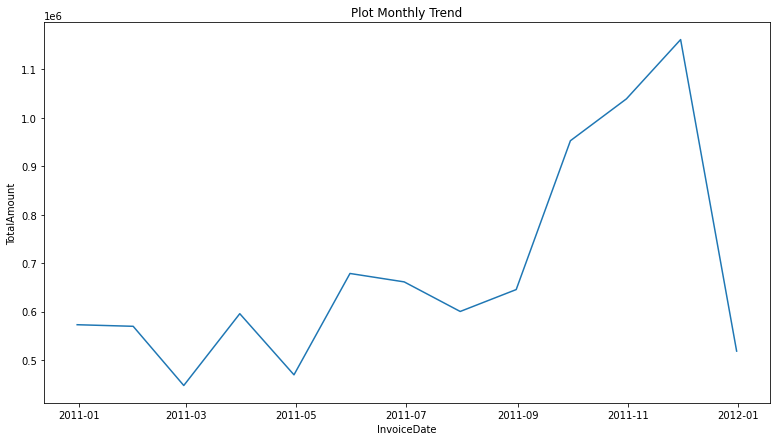

In [ ]:
df['TotalAmount'] = df['UnitPrice'] * df['Quantity']
mly_purchase = df.copy()
mly_purchase = mly_purchase.groupby(by = pd.Grouper(key="InvoiceDate", freq = "1M"))["TotalAmount"].sum()

img = plt.figure(figsize=(13,7))
img = plt.title("Plot Monthly Trend")
img = sns.lineplot(x=mly_purchase.index, y = mly_purchase)
plt.show()

# Modelling

## Recency

In [ ]:
recency = df.groupby(by=['CustomerID'])['InvoiceDate'].max()
recency = max(recency)-recency
recency = recency.dt.days
recency = recency.rename("Recency")

recency.head()

CustomerID
12346.0    325
12347.0      1
12348.0     74
12349.0     18
12350.0    309
Name: Recency, dtype: int64

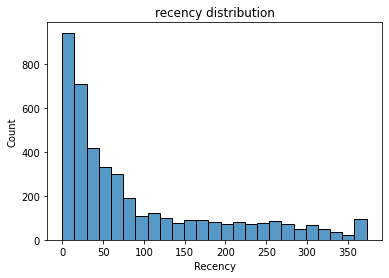

In [ ]:
img = plt.title("recency distribution")
img = sns.histplot(recency)
plt.show()

## Frequency

In [ ]:
freq = df.groupby(by=['CustomerID'])['InvoiceNo'].nunique()
freq = freq.rename("Frequency")

freq.head()

CustomerID
12346.0    1
12347.0    7
12348.0    4
12349.0    1
12350.0    1
Name: Frequency, dtype: int64

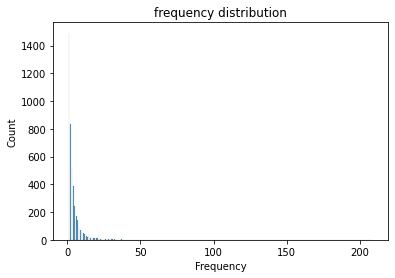

In [ ]:
img = plt.title("frequency distribution")
img = sns.histplot(freq)
plt.show()

## Monetary

In [ ]:
monet = df.groupby(by=['CustomerID'])['TotalAmount'].sum()
monet = monet.rename("Monetary")

monet.head()

CustomerID
12346.0    77183.60
12347.0     4310.00
12348.0     1797.24
12349.0     1757.55
12350.0      334.40
Name: Monetary, dtype: float64

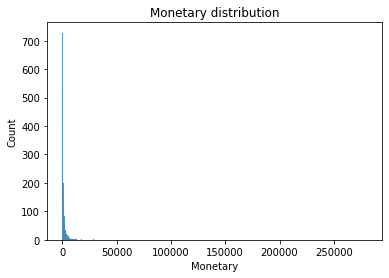

In [ ]:
img = plt.title("Monetary distribution")
img = sns.histplot(monet)
plt.show()

In [ ]:
country = df.groupby(['CustomerID', 'Country_isUK']).size().reset_index().drop(0,axis=1)
country.head()

,CustomerID,Country_isUK
0,12346.0,UK
1,12347.0,Non-UK
2,12348.0,Non-UK
3,12349.0,Non-UK
4,12350.0,Non-UK


In [ ]:
df_new = country\
.merge(recency, on = "CustomerID")\
.merge(freq, on = "CustomerID" )\
.merge(monet, on = "CustomerID")

df_new.head()


,CustomerID,Country_isUK,Recency,Frequency,Monetary
0,12346.0,UK,325,1,77183.60
1,12347.0,Non-UK,1,7,4310.00
2,12348.0,Non-UK,74,4,1797.24
3,12349.0,Non-UK,18,1,1757.55
4,12350.0,Non-UK,309,1,334.40


In [ ]:
df_new = df_new.set_index("CustomerID")

# Ready to Cluster

## Make Dummies for Categorical Variable (Country_isUK)

In [ ]:
df_new = pd.get_dummies(df_new, columns=['Country_isUK'], drop_first = True)
df_new = df_new.rename(columns = {'Country_isUK_UK' : "Country_isUK"})

df_new.head()

,Recency,Frequency,Monetary,Country_isUK
CustomerID,,,,
12346.0,325,1,77183.60,1
12347.0,1,7,4310.00,0
12348.0,74,4,1797.24,0
12349.0,18,1,1757.55,0
12350.0,309,1,334.40,0


In [ ]:
df_new = df_new[['Recency', 'Frequency', 'Monetary']].copy()

## Standart Scaler

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_new)

df_scaled = pd.DataFrame(df_scaled, columns = df_new.columns, index = df_new.index)

df_scaled.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,2.334574,-0.425097,8.358668
12347.0,-0.905340,0.354417,0.250966
12348.0,-0.175360,-0.035340,-0.028596
12349.0,-0.735345,-0.425097,-0.033012
12350.0,2.174578,-0.425097,-0.191347


# Clustering Model

## K-Means Modelling

In [ ]:
possible_k = [3,4,5,6,7,8,9,10]
silhouette = []

for k in possible_k:
  kmeans = KMeans(n_clusters=k, random_state = 100).fit(df_scaled)
  silhouette.append(silhouette_score(X=df_scaled, labels = kmeans.labels_))

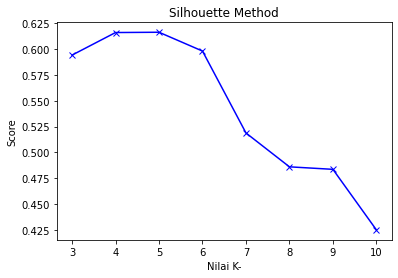

In [ ]:
plt.plot(possible_k, silhouette, 'bx-')
plt.xlabel("Nilai K-")
plt.ylabel("Score")
plt.title("Silhouette Method")
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f2051b63f40>,
                     colors='yellowbrick',
                     estimator=KMeans(max_iter=100, n_clusters=10,
                                      random_state=100))

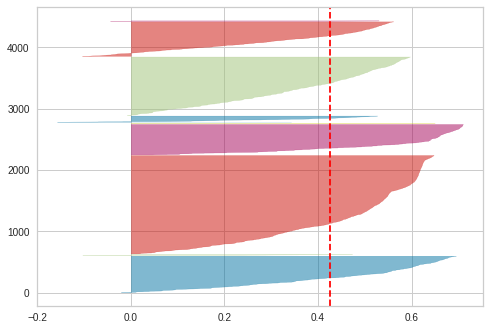

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(6, init='k-means++', n_init=10, max_iter=100, random_state = 100)
 
visualizer = SilhouetteVisualizer(kmeans, colors = 'yellowbrick')
visualizer.fit(df_scaled)

In [ ]:
# Based on Kmeans and silhouette analysis, i picked n_cluster = 6
kmeans = KMeans(n_clusters = 6, random_state=100).fit(df_scaled)

df_result = df_new.copy()
df_result['cluster'] = kmeans.labels_

In [ ]:
df_result.head()

,Recency,Frequency,Monetary,cluster
CustomerID,,,,
12346.0,325,1,77183.60,5
12347.0,1,7,4310.00,0
12348.0,74,4,1797.24,0
12349.0,18,1,1757.55,0
12350.0,309,1,334.40,2


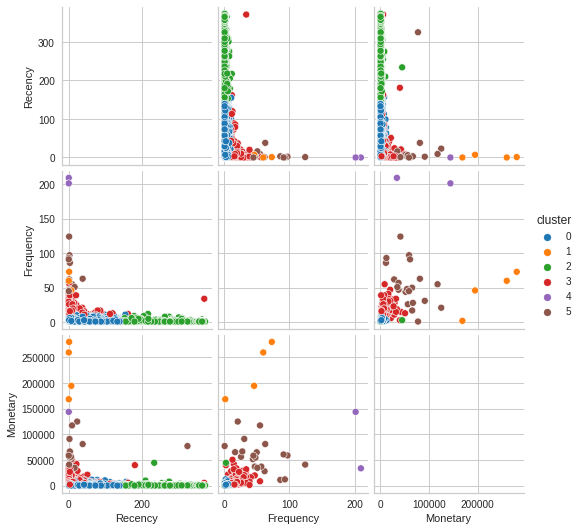

In [ ]:
img = sns.pairplot(data=df_result, hue='cluster', diag_kind = "None", palette = "tab10")
plt.show()

In [ ]:
def q25(x):
  return x.quantile(0.25)

def q75(x):
  return x.quantile(0.75)

df_result.groupby("cluster").aggregate(['mean', 'std', 'min', q25,'median', q75, 'max']).transpose()

cluster                      0              1             2             3  \
Recency   mean       44.187713       2.000000    248.036862     14.662539   
          std        36.455582       3.366502     65.848940     28.686906   
          min         0.000000       0.000000    144.000000      0.000000   
          q25        15.000000       0.000000    190.000000      2.000000   
          median     34.000000       0.500000    242.000000      8.000000   
          q75        66.000000       2.500000    300.000000     18.000000   
          max       157.000000       7.000000    373.000000    371.000000   
Frequency mean        3.308532      45.250000      1.551040     16.931889   
          std         2.309531      30.869348      1.072466      7.279364   
          min         1.000000       2.000000      1.000000      3.000000   
          q25         1.000000      35.000000      1.000000     12.000000   
          median      3.000000      53.000000      1.000000     15.000000   
          q75         5.000000      63.250000      2.000000     20.000000   
          max        11.000000      73.000000     12.000000     55.000000   
Monetary  mean     1211.113066  225721.652500    518.357534   7751.478669   
          std      1306.689700   52818.123796   1495.826978   6646.067708   
          min         6.200000  168472.500000      3.750000   1296.440000   
          q25       372.910000  188031.217500    169.612500   3992.400000   
          median    778.250000  227104.045000    309.670000   5591.420000   
          q75      1601.882500  264794.480000    537.877500   8863.610000   
          max     13219.740000  280206.020000  44534.300000  50491.810000   

cluster                       4              5  
Recency   mean         0.000000      21.333333  
          std          0.000000      70.187843  
          min          0.000000       0.000000  
          q25          0.000000       1.000000  
          median       0.000000       3.000000  
          q75          0.000000       7.000000  
          max          0.000000     325.000000  
Frequency mean       205.000000      54.142857  
          std          5.656854      30.302287  
          min        201.000000       1.000000  
          q25        203.000000      31.000000  
          median     205.000000      50.000000  
          q75        207.000000      63.000000  
          max        209.000000     124.000000  
Monetary  mean     88772.395000   58584.063810  
          std      77856.225488   29255.539222  
          min      33719.730000   11189.910000  
          q25      61246.062500   37153.850000  
          median   88772.395000   58510.480000  
          q75     116298.727500   66653.560000  
          max     143825.060000  124914.530000

In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Country_isUK', 'TotalAmount'],
      dtype='object')

## Dataset Result

In [ ]:
df2 = df.merge(df_result, on ='CustomerID')
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Country_isUK,TotalAmount,Recency,Frequency,Monetary,cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,UK,15.30,371,34,5391.21,3
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,UK,20.34,371,34,5391.21,3
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,UK,22.00,371,34,5391.21,3
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,UK,20.34,371,34,5391.21,3
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,UK,20.34,371,34,5391.21,3


In [ ]:
df2.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Country_isUK', 'TotalAmount',
       'Recency', 'Frequency', 'Monetary', 'cluster'],
      dtype='object')

In [ ]:
df2 = [['CustomerID', '']]

## Eksport Data to CSV

In [ ]:
df2.to_csv('customer_segmentation_(RMF).csv', index=False)

## K dengan Elbow Method

In [ ]:
possible_k = range(3,10)
inertia = []

for k in possible_k:
  model = KMeans(n_clusters = k, random_state = 100)
  model.fit_predict(df_scaled)
  inertia.append(model.inertia_)

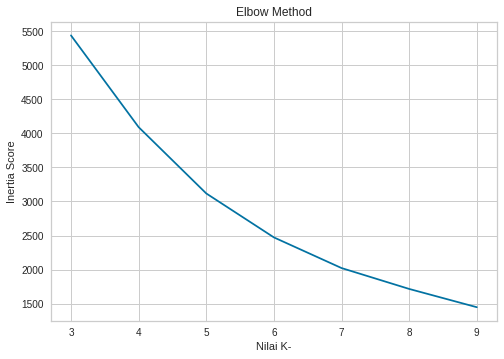

In [ ]:
plt.plot(possible_k, inertia, 'bx-')
plt.xlabel("Nilai K-")
plt.ylabel("Inertia Score")
plt.title("Elbow Method")
plt.show()

IndexError: ignored

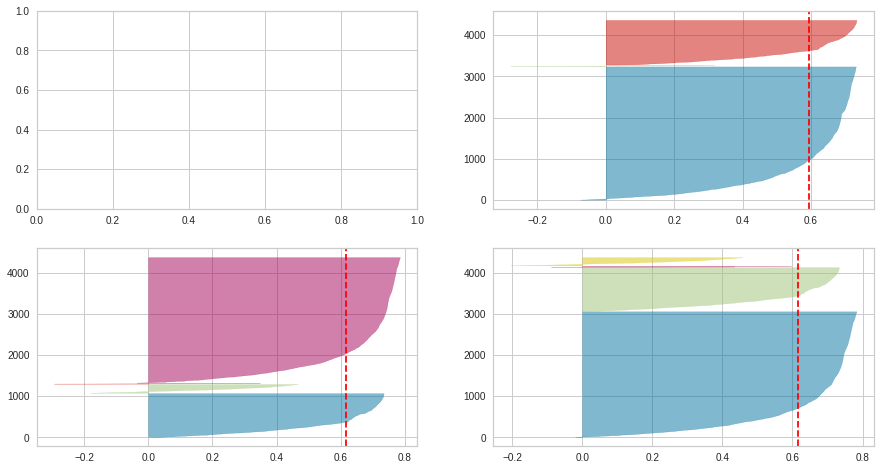

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for k in range(3,10):
    '''
    Create KMeans instance for different number of clusters
    '''
    kmeans = KMeans(n_clusters = k, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(k, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_scaled)

In [ ]:
kmeans = KMeans(n_clusters = 4 #PUT BEST K HERE \
                , random_state=100).fit(df_scaled)

df_result2 = df_new.copy()
df_result2['cluster'] = kmeans.labels_

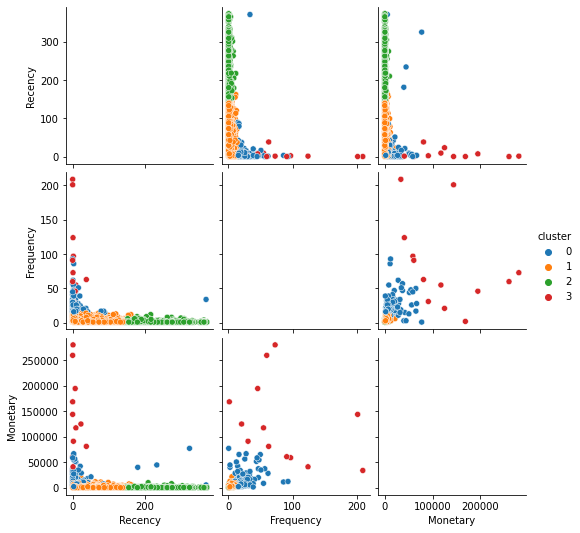

In [ ]:
img = sns.pairplot(data=df_result2, hue='cluster', diag_kind = "None", palette = "tab10")
plt.show()

In [ ]:
#Analyze cluster
def q25(x):
  return x.quantile(0.25)

def q75(x):
  return x.quantile(0.75)

df_result2.groupby("cluster").aggregate(['mean', 'std', 'min', q25,'median', q75, 'max']).transpose()

cluster                      0             1            2              3
Recency   mean       14.672986     42.920380   247.564030       6.384615
          std        40.288273     36.187780    66.102662      11.485777
          min         0.000000      0.000000   143.000000       0.000000
          q25         2.000000     14.000000   189.000000       0.000000
          median      4.000000     32.000000   242.000000       1.000000
          q75        14.000000     65.000000   299.500000       7.000000
          max       371.000000    162.000000   373.000000      38.000000
Frequency mean       22.047393      3.656291     1.551789      82.538462
          std        11.591361      2.817888     1.071722      63.264808
          min         1.000000      1.000000     1.000000       2.000000
          q25        15.000000      1.000000     1.000000      46.000000
          median     19.000000      3.000000     1.000000      63.000000
          q75        25.000000      5.000000     2.000000      97.000000
          max        93.000000     14.000000    12.000000     209.000000
Monetary  mean    12453.225924   1350.140532   478.107581  127338.313846
          std     13015.709030   1532.396438   635.647982   79723.434398
          min      1296.440000      6.200000     3.750000   33719.730000
          q25      5368.720000    383.957500   169.612500   60767.900000
          median   7857.100000    825.860000   309.925000  117379.630000
          q75     13358.320000   1778.075000   537.877500  168472.500000
          max     77183.600000  21429.390000  9864.260000  280206.020000

In [ ]:
# Assigning Cluster into Dataset
df_new1 = df_result2.copy()
df_new1.dropna(axis = 0, inplace = True)
df_new1 = df_new1.drop(columns = ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
                                  'UnitPrice', 'CustomerID'])
df_new1.info()
df_new1.head()

KeyError: ignored